__Problem Statement__ - 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("day.csv")

__About Dataset__
   - instant: record index
   - dteday : date
   - season : season (1:spring, 2:summer, 3:fall, 4:winter)
   - yr : year (0: 2018, 1:2019)
   - mnth : month ( 1 to 12)
   - holiday : weather day is holiday or not
   - weekday : day of the week
   - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
   + weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
   - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
   - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
   - hum: Normalized humidity. The values are divided to 100 (max)
   - windspeed: Normalized wind speed. The values are divided to 67 (max)
   - casual: count of casual users
   - registered: count of registered users
   - cnt: count of total rental bikes including both casual and registered

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 __Data Cleaning__

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Observations :

1. We have just one column with Object data type, however it contains Dates.
2. Majority of the columns have int data type, while a few are float
3. Some categorical fields have numerical data types (will analyse & convert them to categorical if needed)

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We have no null values present in any column of the dataset

In [7]:
data.duplicated().sum()

0

We have no duplicate values present in any column of the dataset

#### observation
 - Columns : season, yr, month, holiday, weekday and weathersit despite being categorical in nature have int64 as datatype. 

#### We can instead map some of these columns

In [8]:
data.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

It is clearly a categorical nominal data. We can map it to the respective seasons in order to draw better inference :

    1: spring
    2: summer
    3: fall
    4: winter

Dictionary - key: "value"

In [9]:
data['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace =True)

#### Similarly mapping weekdays to the respective values

- 0: Sunday
- 1: Monday
- 2: Tuesday
- 3: Wednesday
- 4: Thursday
- 5: Friday
- 6: Saturday

In [10]:
data['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace =True)

#### Mapping weathersit with the respective values 
 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [11]:
data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
data['weathersit'].replace({1: 'Clear/Partly cloudy', 2: 'Mist/Cloudy', 3: 'Light-Snow/Rain/Storm'}, inplace =True)

Since fourth category isn't present in our dataset, we don't need to map it

In [13]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Wednesday,1,Clear/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Thursday,1,Clear/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Friday,1,Clear/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Since some of the columns are redundant and an be remove without impacting our analysis :

- *__instant__* : Just shows up the index value for each record
- *__casual & registered__* : Our target variable *__cnt__* already shows up the sum of casual and registered and hence we can drop these two
- *__date__* : Clearly, month and year are separately displayed in other columns (month and yr) We can hence manage without this column

Adding these changes to a new dataframe in order to preserve the original one for later reference.

In [14]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
bike = data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


It's visible that even some of the categorical variables have float64/int64 datatype.

### We can convert these to object type

In [17]:
bike['mnth'] = bike['mnth'].astype('object')
bike['weekday'] = bike['weekday'].astype('object')
bike['season'] = bike['season'].astype('object')
bike['weathersit'] = bike['weathersit'].astype('object')

In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Exploratory Data Analysis (EDA)

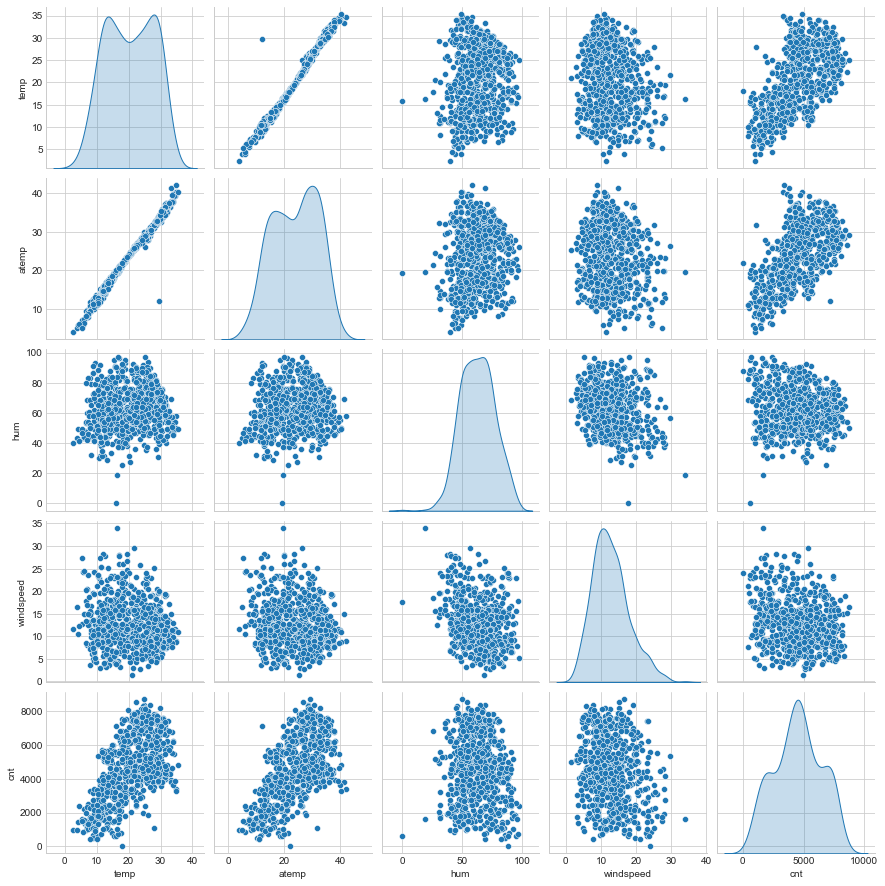

In [19]:
# numerical variables
num_vars = bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.style.use('seaborn-whitegrid')
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

__Observation__ - From the above pair plot it can be clearly observed that there exists a linear relationship between temp, atemp, and cnt.

It is evident that we have two similar fields :

- temp : temperature in Celsius
- atemp: feeling temperature in Celsius

We can check if there exists a positive correlation between them

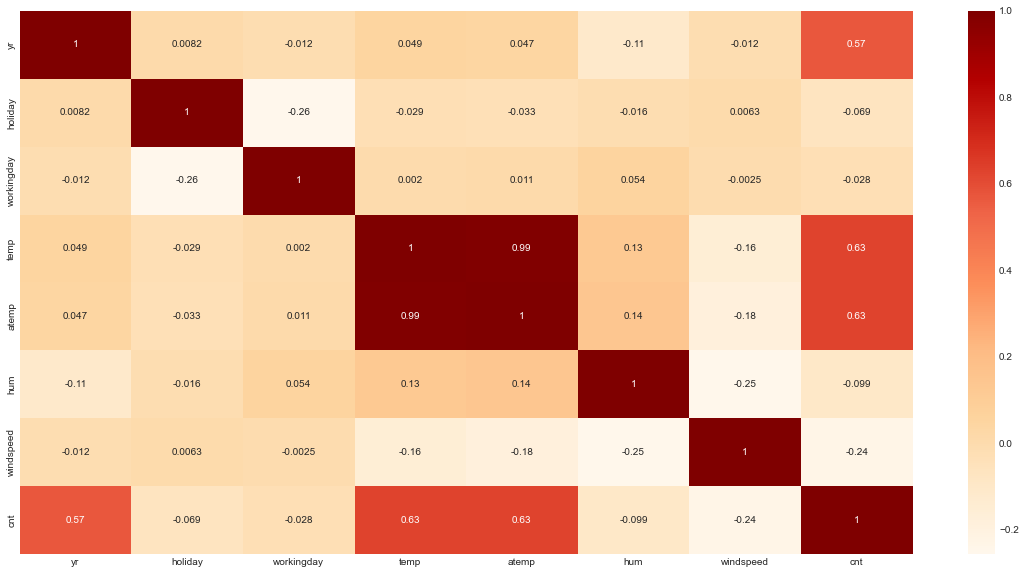

In [20]:
# using heatmap to check correlation

plt.figure(figsize=(20,10))
sns.heatmap(bike.corr(), annot = True, cmap="OrRd")
plt.show()


As suspected, there is 99% correlation between temp and atemp.We can hence drop one of these later while building our model.

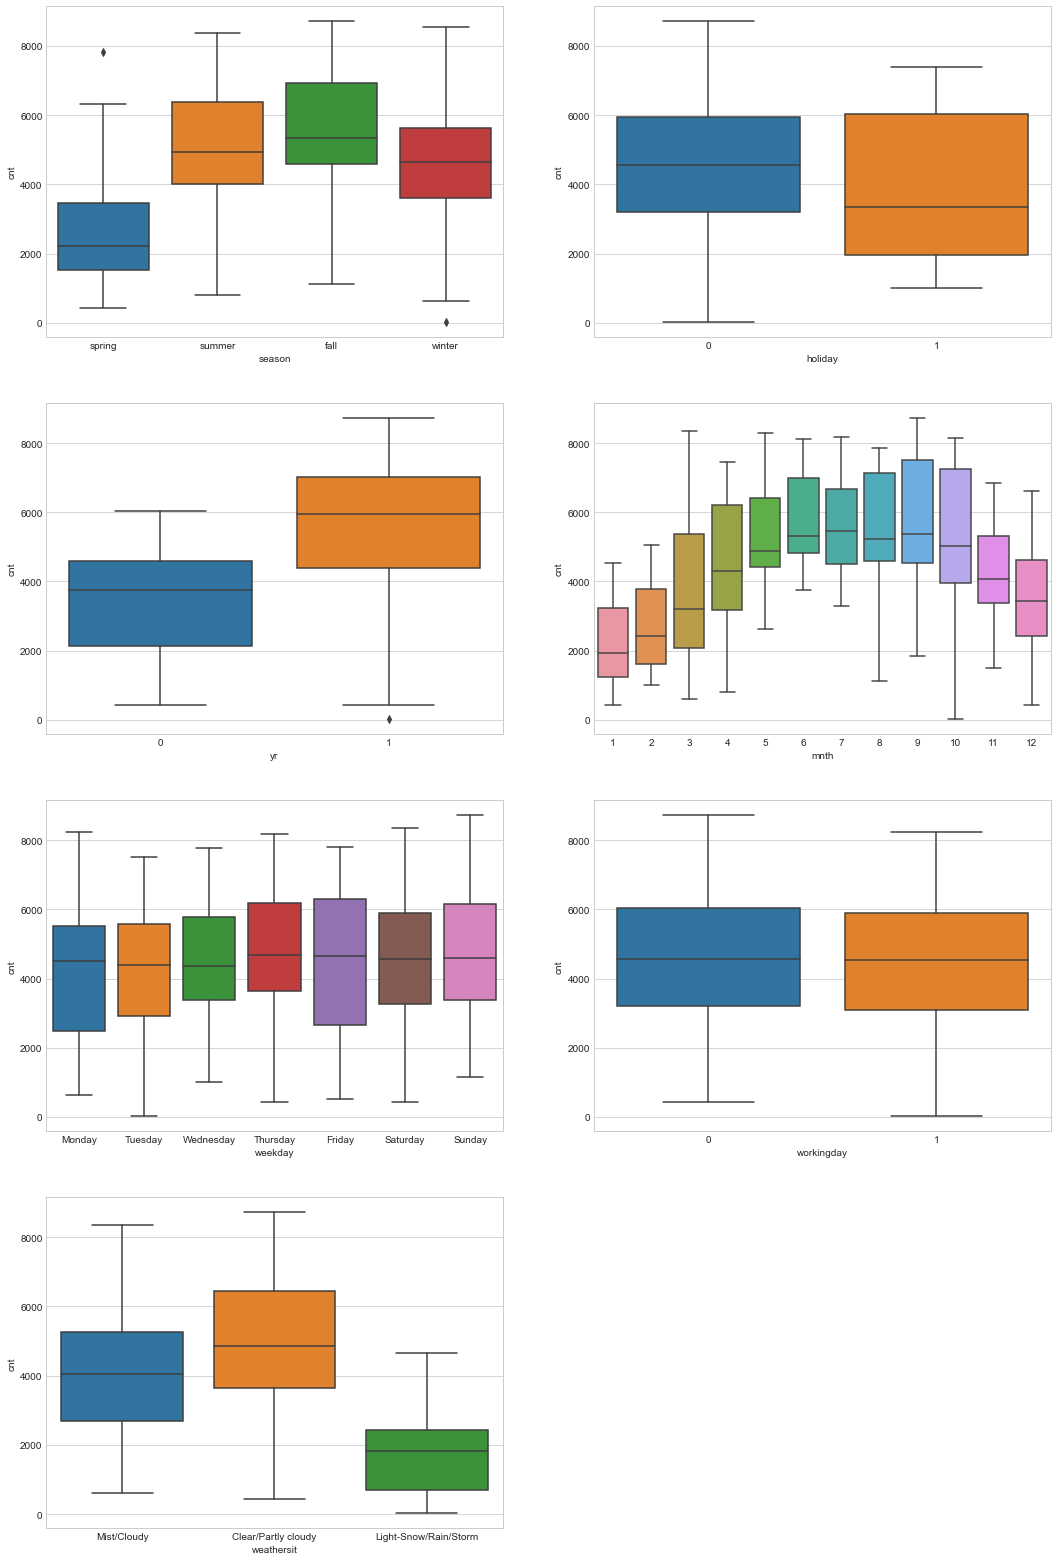

In [21]:
#Categorical variables analysis
plt.figure(figsize=(18, 28))
plt.style.use('seaborn-whitegrid')

plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data= bike)

plt.subplot(4,2,2)
sns.boxplot(x='holiday', y='cnt', data= bike)

plt.subplot(4,2,3)
sns.boxplot(x='yr', y= 'cnt', data= bike)

plt.subplot(4,2,4)
sns.boxplot(x='mnth', y='cnt', data= bike)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data= bike)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data= bike)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data= bike)

plt.show()

__Observation__

1. season : One-third (more than 30%) of the bookings were done in fall season and the median lies around 5000, followed by Summer and Winter. Clealry this can serve as a good predictor for our analysis.

2. holiday : Majority(~ 97%) of the booking took place whne it wasn't a holiday. We have a very high bias here and thus it maynot be a good predctor variable.

3. yr : During yr 1 , we have more number of bookings (almost twice) than yr 0. Since our analysis will be based only on two years (2018 and 2019), they are important predictors.

4. mnth : Distribution of months looks like a normally distributed, with months : 5-9 leading in number of bbokings and crossing the median over around 4500-5000. This indeed can serve as a good predictor.

5. weekday : No clear pattern observed here as all the days show a similar spread This maynot be able to serve as a good predictor

6. workingday : We have a high booking count on working day (i.e 1)and a median value close to 5000. It may serve as a good predictor

7. weathersit : Majority of the bookings took place during a clear/partly cloudy weather with a median at around 5000 followed by misty/cloudy weather, with median 4000. This can also serve as a good predictor.

In [22]:
# Generic function to plot graphs

def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

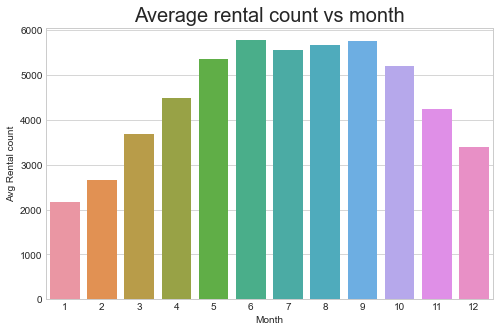

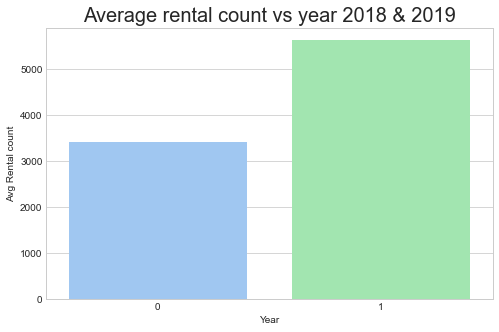

In [23]:
#month vs rental count
dist1 = data.groupby(by= 'mnth').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs month', x_label = 'Month', y_label='Avg Rental count')

#yr vs rental count
dist2 = data.groupby(by='yr').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs year 2018 & 2019', x_label = 'Year', y_label='Avg Rental count')


Plot 1 : Highest rental counts during July-Sept (fall season) and lowest during Dec-Feb (extreme weather)

Plot 2 : Rental counts are almost twice for year 1 as compared to year 0

In [24]:
df_1=data.loc[data['season']=='spring']
df_2=data.loc[data['season']=='summer']
df_3=data.loc[data['season']=='fall']
df_4=data.loc[data['season']=='winter']

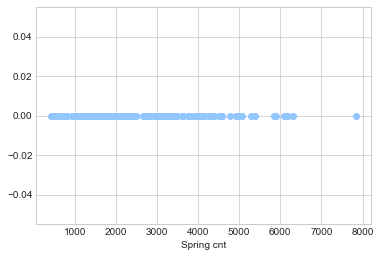

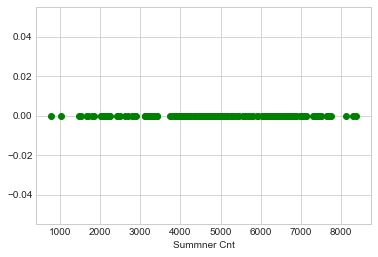

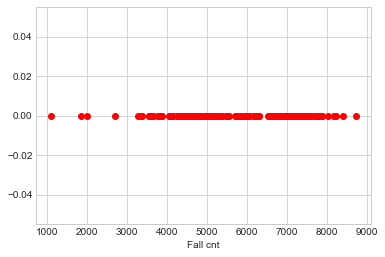

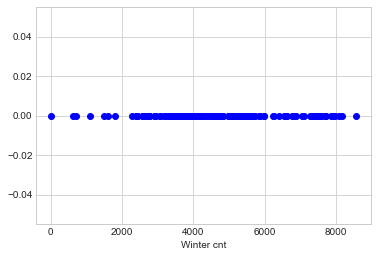

In [25]:
# Create a univariate diagram with 'workingday'
plt.plot (df_1['cnt'],np.zeros_like(df_1['cnt']),'o')
plt.xlabel('Spring cnt')
plt.show()
plt.plot (df_2['cnt'],np.zeros_like(df_2['cnt']),'go')
plt.xlabel('Summner Cnt')
plt.show()
plt.plot (df_3['cnt'],np.zeros_like(df_3['cnt']),'ro')
plt.xlabel('Fall cnt')
plt.show()
plt.plot (df_4['cnt'],np.zeros_like(df_4['cnt']),'bo')
plt.xlabel('Winter cnt')
plt.show()


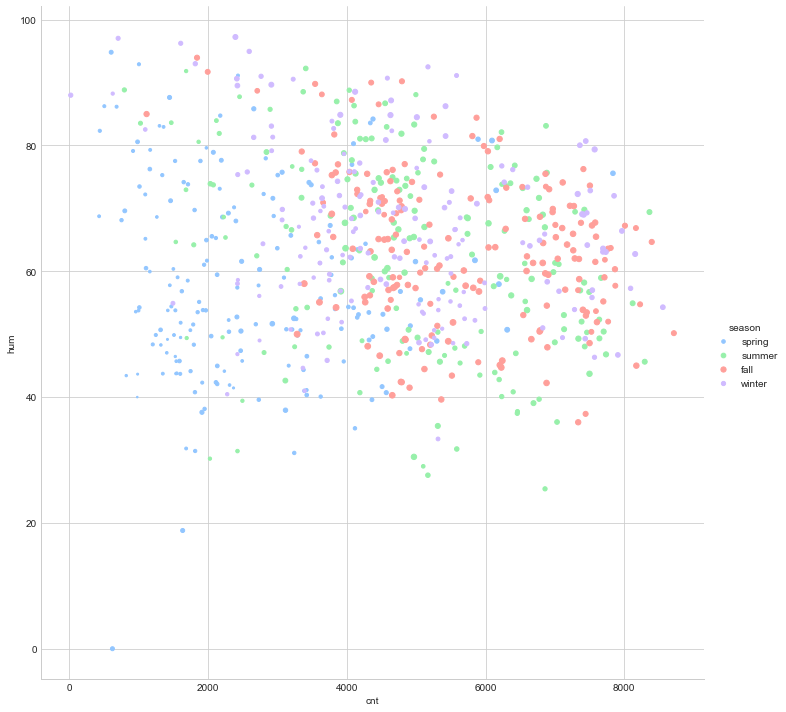

In [26]:
sns.FacetGrid(data,hue='season',size=10).map(plt.scatter,"cnt","hum","temp").add_legend()
plt.show()

In [27]:
df = pd.read_csv('day.csv')

In [28]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [29]:
# Create a new feature that indicates whether a day is a holiday eve or not
df["holiday_eve"] = df["holiday"].shift(-1).fillna(0)
df["holiday"] = (df["holiday"] + df["holiday_eve"]).apply(lambda x: 1 if x >= 1 else 0)

df[df["holiday"]!= 0][["dteday","holiday"]]

,dteday,holiday
15,16-01-2018,1
16,17-01-2018,1
50,20-02-2018,1
51,21-02-2018,1
103,14-04-2018,1
104,15-04-2018,1
148,29-05-2018,1
149,30-05-2018,1
183,03-07-2018,1
184,04-07-2018,1


In [30]:
# Create a feature that indicates whether it's comfortable or not
df["comfortable_temp"] = ((df["atemp"] > 0.40) & (df["atemp"] < 0.65)).astype(int)

df[["atemp","comfortable_temp"]]

,atemp,comfortable_temp
0,18.18125,0
1,17.68695,0
2,9.47025,0
3,10.60610,0
4,11.46350,0
...,...,...
725,11.33210,0
726,12.75230,0
727,12.12000,0
728,11.58500,0


In [31]:
# Create a feature that indicates whether it's humid or not
df["comfortable_humidity"] = ((df["hum"] > 0.25) & (df["hum"] < 0.55)).astype(int)

df[["hum", "comfortable_humidity"]]

,hum,comfortable_humidity
0,80.5833,0
1,69.6087,0
2,43.7273,0
3,59.0435,0
4,43.6957,0
...,...,...
725,65.2917,0
726,59.0000,0
727,75.2917,0
728,48.3333,0


In [32]:
df = df.drop(["instant", "temp","holiday_eve"], axis=1)

In [40]:
df = df.drop(["casual", "registered"],axis=1)

In [41]:
df[df["hum"] == 0].head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,comfortable_temp,comfortable_humidity


In [42]:
# Removing rows where humidity == 0
df = df[df["hum"] != 0]

df[df["hum"] == 0].head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,comfortable_temp,comfortable_humidity


In [47]:
bike = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed','cnt']]

In [48]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,11.58500,48.3333,23.500518,1796


### Creating dummy variables for four major categorical variables :

* mnth
 
* weathersit

* season

* weekday

Drop original categorical variables once dummies have been created, Drop the first value for each of the dummy variables.

In [49]:
new_bike = pd.get_dummies(bike, drop_first=True)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      729 non-null    int64  
 1   yr          729 non-null    int64  
 2   mnth        729 non-null    int64  
 3   holiday     729 non-null    int64  
 4   weekday     729 non-null    int64  
 5   workingday  729 non-null    int64  
 6   weathersit  729 non-null    int64  
 7   atemp       729 non-null    float64
 8   hum         729 non-null    float64
 9   windspeed   729 non-null    float64
 10  cnt         729 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 68.3 KB


In [50]:
new_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [ ]:
new_bike.shape

## Model Building

In [51]:
test = np.log(new_bike['cnt'])
train = new_bike.drop(['cnt'],axis = 1)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [53]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   train_size = 0.8, test_size = 0.2,random_state=42)

X_train.shape,X_test.shape

((583, 10), (146, 10))

There's a Class which we imported named as Column Trasnformer we use this widely while building our models using Pipelines,so for this we have to get the index numbers of the columns which are having categorical variables

In [54]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'season',
 1: 'yr',
 2: 'mnth',
 3: 'holiday',
 4: 'weekday',
 5: 'workingday',
 6: 'weathersit',
 7: 'atemp',
 8: 'hum',
 9: 'windspeed'}

## Linear Regression

In [55]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
248,3,0,9,0,4,1,3,25.76000,88.6957,23.044181
336,4,0,12,0,1,1,1,15.53020,61.2917,6.417481
702,4,1,12,0,3,1,1,23.45270,73.3750,11.666643
441,1,1,3,0,1,1,2,23.20000,81.0000,8.501161
137,2,0,5,0,5,1,2,26.35790,87.0000,13.499964
...,...,...,...,...,...,...,...,...,...,...
72,1,0,3,0,3,1,1,16.60000,49.6957,9.174042
107,2,0,4,0,3,1,1,25.15730,54.2500,10.958989
271,4,0,9,0,6,0,1,28.72560,69.9167,11.583161
436,1,1,3,0,3,1,1,27.14645,61.7500,15.875650


In [56]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0,1,2,3,4,5,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8138273546447361
MAE 0.16781560133867288


In [57]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('step2', LinearRegression())])

In [58]:
np.exp(0.16)

1.1735108709918103

now mae is 0.17 so if you want to check how much difference is there do this

we see there is a difference of 1.18 only as per the orignal value
that is our model predicts +-0.18 more/less than the original value!

## Ridge Regression

In [59]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8139914579282013
MAE 0.1733405489167674


## LassoRegression

In [60]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8182382939788184
MAE 0.1679277804669112


## Decision Tree

In [61]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6819730967435876
MAE 0.1875598941651086


## Random Forest

In [62]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.86132321597368
MAE 0.13712779222012167


In [63]:
train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300


In [64]:
train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [65]:
train.to_csv('traineddata.csv',index=None)

## Hyperparameter Tuning for Random Forest

In [66]:
indexlist = [0,1,2,3,4,5,6]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [67]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,18.18125,80.5833,10.749882,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,17.68695,69.6087,16.652113,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,9.47025,43.7273,16.636703,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,10.60610,59.0435,10.739832,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,11.46350,43.6957,12.522300,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   train_size = 0.8, test_size = 0.2,random_state=2)

X_train.shape,X_test.shape

((583, 28), (146, 28))

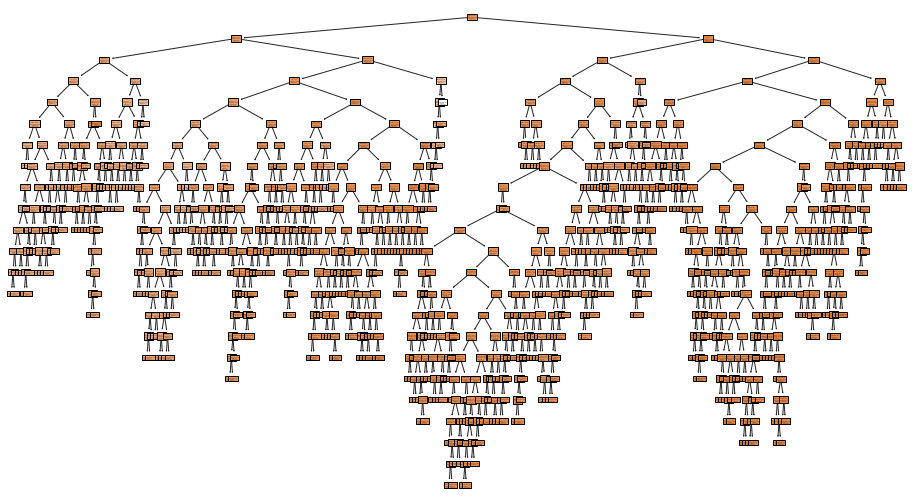

In [69]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns);

In [70]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [71]:
ccp_alphas

array([0.00000000e+00, 3.10036974e-11, 3.61673321e-10, 4.84657495e-10,
       5.49324489e-10, 7.10078043e-10, 7.40071137e-10, 8.60786424e-10,
       8.88095421e-10, 1.82643203e-09, 2.01360465e-09, 2.22391630e-09,
       2.55520304e-09, 2.94035179e-09, 3.02172392e-09, 5.89275099e-09,
       6.46994216e-09, 6.84837679e-09, 6.95653957e-09, 8.99018540e-09,
       9.37241438e-09, 9.52682903e-09, 1.01320059e-08, 1.04030410e-08,
       1.06557415e-08, 1.14309162e-08, 1.26681622e-08, 1.39443818e-08,
       1.42505518e-08, 1.44724673e-08, 1.46548516e-08, 1.46723822e-08,
       1.48715085e-08, 1.49457941e-08, 1.51968276e-08, 1.58043760e-08,
       1.61785079e-08, 1.76104248e-08, 1.82130854e-08, 1.92245638e-08,
       1.99714370e-08, 2.03878697e-08, 2.32164944e-08, 2.38513121e-08,
       2.48629228e-08, 2.52196424e-08, 2.65840988e-08, 2.72921050e-08,
       2.82971862e-08, 3.13269854e-08, 3.14096831e-08, 3.15954996e-08,
       3.21016989e-08, 3.36515681e-08, 3.38816031e-08, 3.45917926e-08,
      

In [72]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

In [73]:
alphalist

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=3.1003697417646695e-11, random_state=0),
 DecisionTreeRegressor(ccp_alpha=3.616733213661576e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.846574950020729e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.493244890791771e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=7.100780432484525e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=7.400711368299204e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=8.607864244148138e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=8.88095421483478e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.8264320279166697e-09, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.0136046457065397e-09, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.223916300971135e-09, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.5552030367701173e-09, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.9403517882362094e-09, random_state=0),
 Decisi

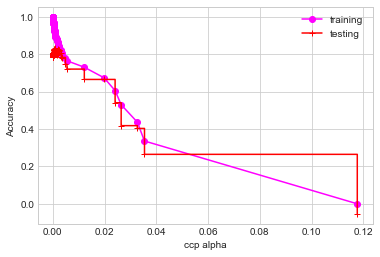

In [74]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.6, 0.9166666666666666, 'atemp <= 22.096\nsquared_error = 0.351\nsamples = 583\nvalue = 8.263'),
 Text(0.4, 0.75, 'atemp <= 13.036\nsquared_error = 0.419\nsamples = 256\nvalue = 7.875'),
 Text(0.3, 0.5833333333333334, 'squared_error = 0.222\nsamples = 72\nvalue = 7.421'),
 Text(0.5, 0.5833333333333334, 'weathersit_3 <= 0.5\nsquared_error = 0.383\nsamples = 184\nvalue = 8.052'),
 Text(0.3, 0.4166666666666667, 'yr_1 <= 0.5\nsquared_error = 0.221\nsamples = 179\nvalue = 8.106'),
 Text(0.2, 0.25, 'season_4 <= 0.5\nsquared_error = 0.174\nsamples = 85\nvalue = 7.812'),
 Text(0.1, 0.08333333333333333, 'squared_error = 0.127\nsamples = 51\nvalue = 7.576'),
 Text(0.3, 0.08333333333333333, 'squared_error = 0.036\nsamples = 34\nvalue = 8.165'),
 Text(0.4, 0.25, 'squared_error = 0.115\nsamples = 94\nvalue = 8.372'),
 Text(0.7, 0.4166666666666667, 'weekday_2 <= 0.5\nsquared_error = 2.387\nsamples = 5\nvalue = 6.129'),
 Text(0.6, 0.25, 'squared_error = 0.1\nsamples = 4\nvalue = 6.888'),
 Text

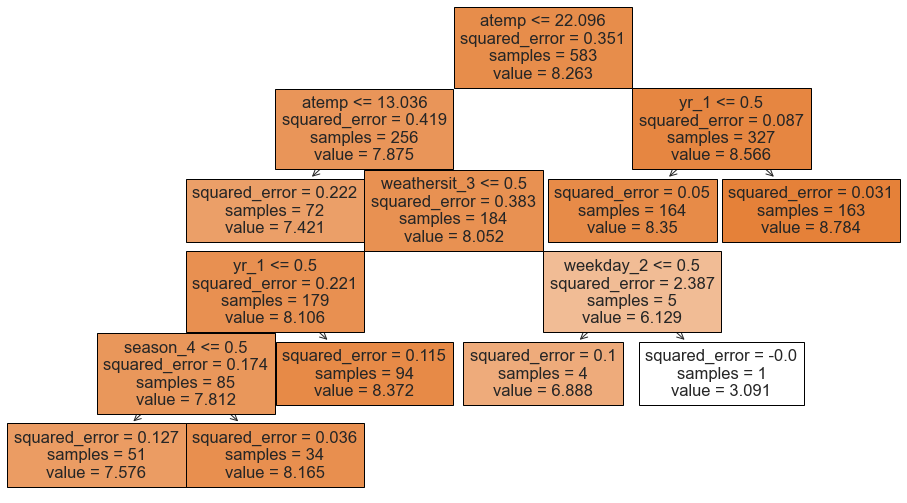

In [75]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [76]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [77]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=833; total time=   0.7s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=833; total time=   0.7s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=833; total time=   0.6s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=833; total time=   0.6s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=833; total time=   0.7s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=833; total time=   2.5s
[CV] END ccp_alpha=0.

In [78]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.132403,"(DecisionTreeRegressor(ccp_alpha=0.0025, max_d..."
1,Decision Tree,-0.144607,"DecisionTreeRegressor(ccp_alpha=0.0025, criter..."


In [79]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.13240321870855265,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='mse', max_depth=30,
                        min_samples_leaf=14, min_samples_split=14,
                        n_estimators=955)},
 {'model_name': 'Decision Tree',
  'best_score': -0.14460710114493663,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0025, criterion='mae', max_depth=22,
                        max_features='auto', min_samples_leaf=2,
                        min_samples_split=10)}]

In [80]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

-1.3256047014361978


## Prediction on the whole Dataset

In [81]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

[array([7.58103556]),
 array([7.62163111]),
 array([7.25283572]),
 array([7.21790761]),
 array([7.31327684]),
 array([7.33845745]),
 array([7.25168796]),
 array([7.24275821]),
 array([7.24706661]),
 array([7.25283572]),
 array([7.15946543]),
 array([7.1994235]),
 array([7.2524279]),
 array([7.24280737]),
 array([7.41012567]),
 array([7.35690066]),
 array([7.24341617]),
 array([7.18075378]),
 array([7.48281194]),
 array([7.51017108]),
 array([7.24706661]),
 array([7.25194295]),
 array([7.25283572]),
 array([7.25132778]),
 array([7.2984619]),
 array([7.12249784]),
 array([7.16276103]),
 array([7.17845334]),
 array([7.18666728]),
 array([7.32581446]),
 array([7.19821934]),
 array([7.22105389]),
 array([7.36279253]),
 array([7.25263081]),
 array([7.28469054]),
 array([7.24010659]),
 array([7.54326868]),
 array([7.50762521]),
 array([7.23871579]),
 array([7.25218186]),
 array([7.25283572]),
 array([7.25348034]),
 array([7.32377773]),
 array([7.58245132]),
 array([7.67164813]),
 array([7.488

As we transformed our cnt variable to np.log
we have to retranform it from np.log-->np.exp inorder to get the result

In [82]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [83]:
new_bike['Predicted count'] = np.array(ans)
new_bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Predicted count
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985,1960.658298
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801,2041.889966
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349,1412.103503
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562,1363.632828
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600,1500.084682
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,11.33210,65.2917,23.458911,2114,2065.692395
726,1,1,12,0,6,0,2,12.75230,59.0000,10.416557,3095,2620.466765
727,1,1,12,0,0,0,2,12.12000,75.2917,8.333661,1341,2072.769709
728,1,1,12,0,1,1,1,11.58500,48.3333,23.500518,1796,2278.527401


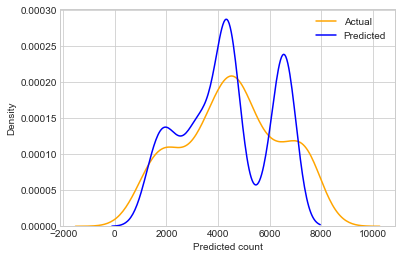

In [84]:
sns.distplot(new_bike['cnt'],hist=False,color='orange',label='Actual')
sns.distplot(new_bike['Predicted count'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

## Random Forest Regressor version_2

In [85]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.883723500292773


In [86]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

[array([7.39528178]),
 array([7.64779938]),
 array([7.24710816]),
 array([7.29383895]),
 array([7.36310081]),
 array([7.26576571]),
 array([7.31490416]),
 array([7.06240924]),
 array([7.07613724]),
 array([7.23521114]),
 array([7.14164572]),
 array([7.16107203]),
 array([7.21978242]),
 array([7.30535959]),
 array([7.37490441]),
 array([7.31051293]),
 array([7.27532695]),
 array([6.93831796]),
 array([7.4355766]),
 array([7.55379944]),
 array([7.23115686]),
 array([7.03435802]),
 array([7.14866593]),
 array([7.21859802]),
 array([7.3940246]),
 array([6.61704374]),
 array([6.77493256]),
 array([7.01751398]),
 array([7.04168149]),
 array([7.19127191]),
 array([7.23430903]),
 array([7.07925847]),
 array([7.32281266]),
 array([7.29667965]),
 array([7.36606505]),
 array([6.99013119]),
 array([7.48207825]),
 array([7.46785009]),
 array([7.29814378]),
 array([7.31305475]),
 array([7.28439995]),
 array([7.32867367]),
 array([7.30043729]),
 array([7.51898286]),
 array([7.553204]),
 array([7.5174

In [87]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [88]:
data = new_bike.copy()
data['Predicted Count'] = np.array(ans)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Predicted count,Predicted Count
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985,1960.658298,1628.283675
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801,2041.889966,2096.027939
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349,1412.103503,1404.038717
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562,1363.632828,1471.207757
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600,1500.084682,1576.718098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,11.33210,65.2917,23.458911,2114,2065.692395,2104.438964
726,1,1,12,0,6,0,2,12.75230,59.0000,10.416557,3095,2620.466765,2582.114834
727,1,1,12,0,0,0,2,12.12000,75.2917,8.333661,1341,2072.769709,1788.278942
728,1,1,12,0,1,1,1,11.58500,48.3333,23.500518,1796,2278.527401,2014.503968


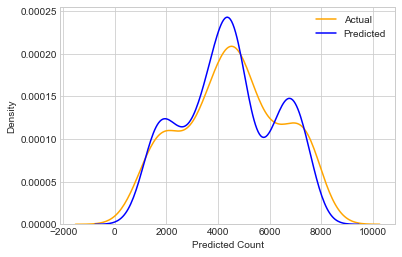

In [89]:
sns.distplot(data['cnt'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Count'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [91]:
new_bike1 = new_bike.drop(['Predicted count'],axis =1)

In [92]:
new_bike1

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,11.58500,48.3333,23.500518,1796


In [93]:
model_df = new_bike1.copy()
X = model_df.drop(['cnt'],axis=1)
y = model_df['cnt']

In [94]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [95]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)

eval_set = [(X_train, y_train),
            (X_val, y_val)]

fit_model = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mae',
    early_stopping_rounds=50,
    verbose=False)

print("MAE:", mean_absolute_error(y_val, fit_model.predict(X_val)))
print("MSE:", mean_squared_error(y_val, fit_model.predict(X_val)))
print("R2:", r2_score(y_val, fit_model.predict(X_val)))

MAE: 399.84545313168877
MSE: 342169.4328183931
R2: 0.901163086283768


In [96]:
step1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}


pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8828413482241946
MAE 530.2793658530876


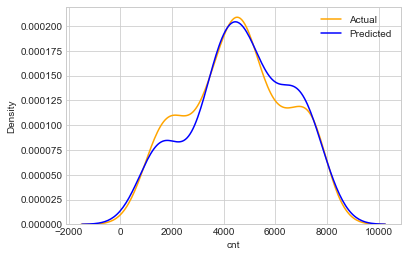

In [98]:
sns.distplot(y,hist=False,color='orange',label='Actual')
sns.distplot(y_pred,hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [101]:
model1= 'trained_model.sav'

In [102]:
pickle.dump(fit_model,open(model1, "wb"))

In [103]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [104]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,comfortable_temp,comfortable_humidity
0,01-01-2018,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985,0,0
1,02-01-2018,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801,0,0
2,03-01-2018,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349,0,0
3,04-01-2018,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562,0,0
4,05-01-2018,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,5,1,2,11.33210,65.2917,23.458911,2114,0,0
726,28-12-2019,1,1,12,0,6,0,2,12.75230,59.0000,10.416557,3095,0,0
727,29-12-2019,1,1,12,0,0,0,2,12.12000,75.2917,8.333661,1341,0,0
728,30-12-2019,1,1,12,0,1,1,1,11.58500,48.3333,23.500518,1796,0,0


In [110]:
df.drop(['cnt','dteday','comfortable_temp','comfortable_humidity'],axis=1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,11.33210,65.2917,23.458911
726,1,1,12,0,6,0,2,12.75230,59.0000,10.416557
727,1,1,12,0,0,0,2,12.12000,75.2917,8.333661
728,1,1,12,0,1,1,1,11.58500,48.3333,23.500518
